In [2]:
!pip install datasets


import pandas as pd
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

TypeError: 'method' object is not subscriptable

In [3]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [7]:
df.groupby(['job_title_short'])['salary_year_avg'].median().sort_values(ascending=False)

job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64

In [8]:
min_salary = df['salary_year_avg'].idxmin()

In [9]:
df.loc[min_salary]

job_title_short                                              Data Engineer
job_title                                           Data Engineer - Hadoop
job_location                                                        Brazil
job_via                                                       via LinkedIn
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     Brazil
job_posted_date                                        2023-12-09 10:05:30
job_no_degree_mention                                                 True
job_health_insurance                                                 False
job_country                                                         Brazil
salary_rate                                                           year
salary_year_avg                                                    15000.0
salary_hour_avg          

In [10]:
df.loc[df['salary_year_avg'].idxmin()]

job_title_short                                              Data Engineer
job_title                                           Data Engineer - Hadoop
job_location                                                        Brazil
job_via                                                       via LinkedIn
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     Brazil
job_posted_date                                        2023-12-09 10:05:30
job_no_degree_mention                                                 True
job_health_insurance                                                 False
job_country                                                         Brazil
salary_rate                                                           year
salary_year_avg                                                    15000.0
salary_hour_avg          

In [11]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [12]:
df.groupby(['job_title_short'])[['salary_year_avg', 'salary_hour_avg']].agg(['min', 'max', 'median'])

salary_year_avg                     salary_hour_avg  \
                                      min       max    median             min   
job_title_short                                                                 
Business Analyst                  16500.0  387460.0   85000.0          10.835   
Cloud Engineer                    42000.0  280000.0   90000.0          18.500   
Data Analyst                      25000.0  650000.0   90000.0           8.000   
Data Engineer                     15000.0  525000.0  125000.0           8.000   
Data Scientist                    27000.0  960000.0  127500.0           8.000   
Machine Learning Engineer         30000.0  325000.0  106415.0          10.000   
Senior Data Analyst               30000.0  425000.0  111175.0          13.000   
Senior Data Engineer              35000.0  425000.0  147500.0          12.500   
Senior Data Scientist             45000.0  890000.0  155500.0          17.500   
Software Engineer                 28000.0  375000.0   99150.0          11.000   

                                             
                             max     median  
job_title_short                              
Business Analyst           132.5  40.362499  
Cloud Engineer              91.0  40.000000  
Data Analyst               391.0  32.615002  
Data Engineer              184.5  58.500000  
Data Scientist             237.5  47.500000  
Machine Learning Engineer   87.5  47.535000  
Senior Data Analyst        130.0  47.500000  
Senior Data Engineer       170.0  61.500000  
Senior Data Scientist      150.0  47.620003  
Software Engineer          102.5  47.560001

In [15]:
df['job_country'].value_counts()

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Mauritania             3
Lesotho                3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64

In [29]:
us_jobs = df[df['job_country'] == 'United States']

In [30]:
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]

In [31]:
us_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"['r', 'python', 'sql', 't-sql', 'hadoop', 'spa...","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"['golang', 'scala', 'python', 'java', 'hadoop'...","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"['r', 'python', 'matplotlib', 'ggplot2', 'spar...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [39]:
us_jobs.groupby(['job_title_short'])['salary_year_avg'].agg(['mean', 'min', 'max', 'median', 'count']).sort_values('count', ascending=False)

,mean,min,max,median,count
job_title_short,,,,,
Data Scientist,139946.707204,30000.0,960000.0,130000.0,4553
Data Analyst,94553.964924,25000.0,375000.0,90000.0,4350
Data Engineer,134226.676753,23496.0,525000.0,125000.0,2915
Senior Data Scientist,159330.432029,55000.0,475000.0,155000.0,1241
Senior Data Engineer,151448.023186,45000.0,375000.0,150000.0,1058
Senior Data Analyst,115729.129954,35360.0,425000.0,110000.0,913
Business Analyst,96175.447397,35000.0,387460.0,90000.0,431
Software Engineer,137964.929588,48982.0,375000.0,130000.0,157
Machine Learning Engineer,154240.382812,44408.5,315000.0,150000.0,128


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

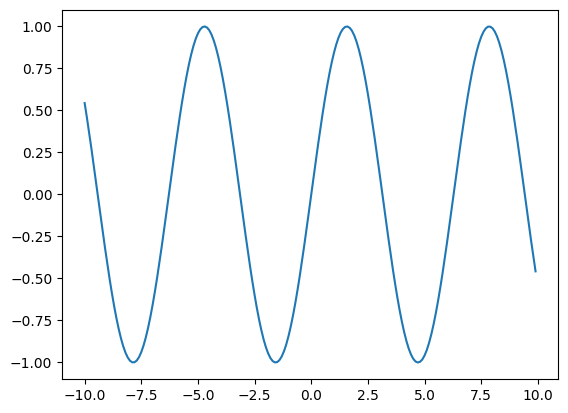

In [45]:
x = np.arange(-10, 10, 0.1)
y = np.sin(x)

plt.plot(x,y)

In [48]:
df[['job_posted_date']].head()

,job_posted_date
0,2023-06-16 13:44:15
1,2023-01-14 13:18:07
2,2023-10-10 13:14:55
3,2023-07-04 13:01:41
4,2023-08-07 14:29:36


In [54]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

In [65]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [66]:
monthly_counts = df.job_posted_month.value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

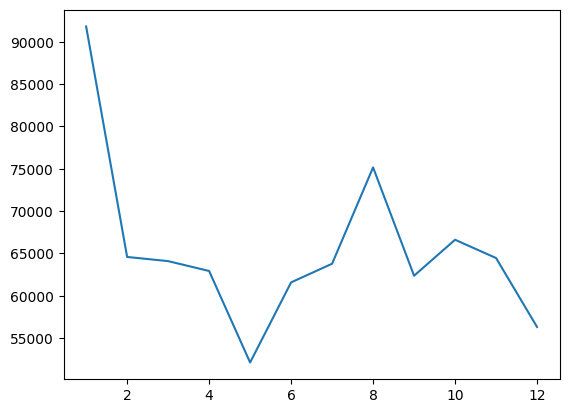

In [67]:
plt.plot(monthly_counts)

In [83]:
job_counts = df.job_title_short.value_counts()

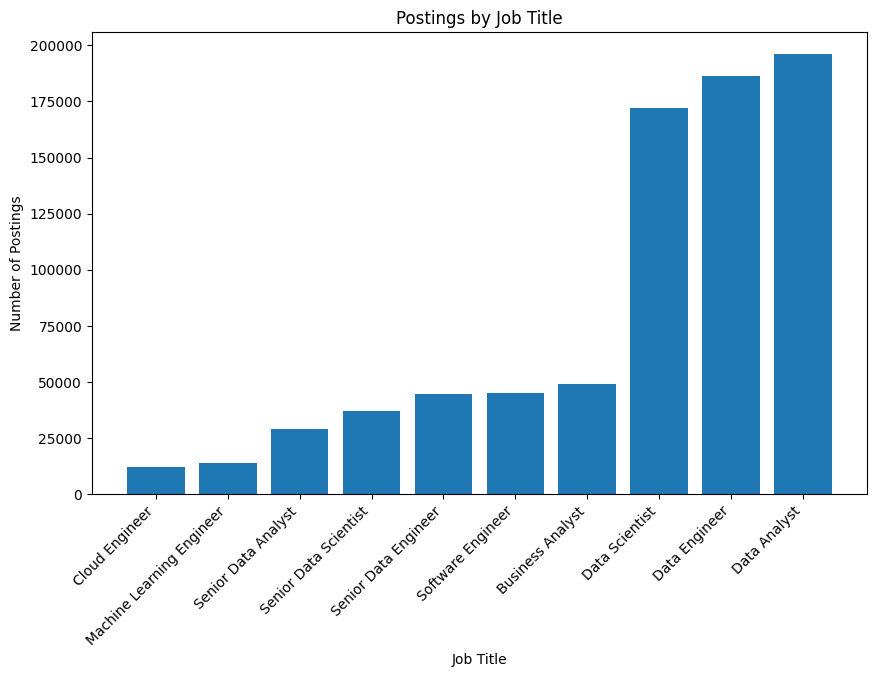

In [98]:
job_counts = job_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(job_counts.index, job_counts)
plt.title('Postings by Job Title')
plt.ylabel('Number of Postings')
plt.xlabel('Job Title')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='job_title_short'>

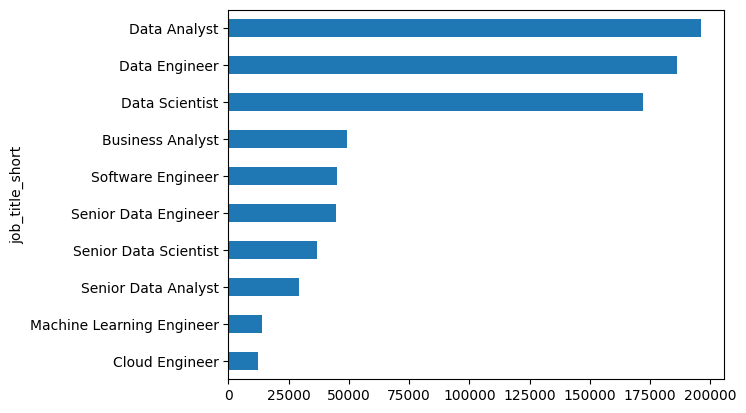

In [85]:
job_counts.plot(kind='barh')

<Axes: xlabel='job_posted_date', ylabel='salary_year_avg'>

<Figure size 1000x600 with 0 Axes>

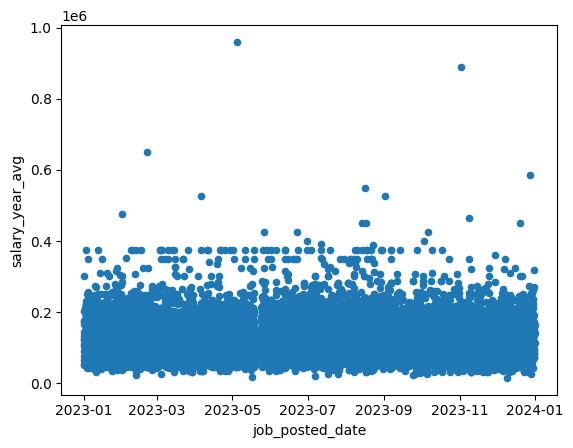

In [107]:

plt.figure(figsize=(10, 6))
df.plot(x='job_posted_date', y='salary_year_avg', kind='scatter')


In [112]:
median_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)

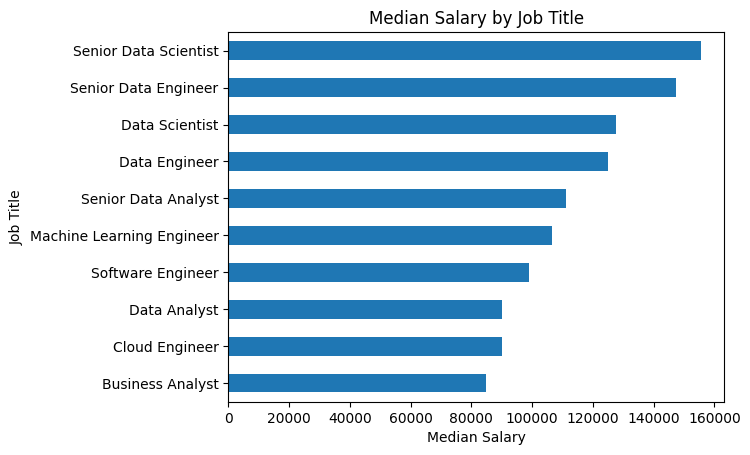

In [114]:
median_salary.plot(kind='barh')
plt.title('Median Salary by Job Title')
plt.xlabel('Median Salary')
plt.ylabel('Job Title')
plt.show()